In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

In [ ]:
import time
from scipy import stats
import datetime
import statistics
import decimal
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

import  os
import random
import math 

from sklearn.model_selection import train_test_split
import xgboost as xgb

random.seed(1)
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
# df=pd.read_csv('/content/drive/My Drive/Sel50_IoT_Intrusion_Dataset_2020.csv');
df=pd.read_csv('/content/drive/My Drive/IoT Intrusion Dataset 2020.csv')

Mounted at /content/drive


In [ ]:
import ipaddress
df['Src_IP'] = df['Src_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Dst_IP'] = df['Dst_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Timestamp']=pd.to_datetime(df['Timestamp']).astype(int)/10**9
le=LabelEncoder()
df.Flow_ID=LabelEncoder().fit_transform(df.Flow_ID).astype(int)
df.Sub_Cat=LabelEncoder().fit_transform(df.Sub_Cat)
df.Sub_Cat=df.Sub_Cat.astype('category')
df.Label=le.fit_transform(df.Label).astype('int')
df.Cat=LabelEncoder().fit_transform(df.Cat).astype('int')
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df = df.astype(int)
df.describe(include='all')

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
count,625783.000000,6.257830e+05,625783.000000,6.257830e+05,625783.000000,625783.000000,6.257830e+05,625783.000000,625783.000000,625783.00000,...,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,28079.323058,3.024599e+09,35026.156190,3.211216e+09,16387.027479,9.971436,1.564209e+09,635.422865,1.675566,1.46853,...,0.347461,4.248735,3.462159,502.399490,52.238576,561.540512,467.264459,0.064037,2.058237,4.052426
std,21216.447228,5.777931e+08,24721.047752,4.942313e+08,17550.363037,5.379857,5.267774e+06,3496.740723,4.309970,1.21949,...,20.714507,88.934148,64.111043,2112.973007,1153.169296,2866.497606,1931.909971,0.244818,0.988888,2.166035
min,0.000000,2.998509e+07,0.000000,1.600000e+01,0.000000,0.000000,1.551844e+09,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12682.000000,3.232236e+09,9020.000000,3.232236e+09,8899.000000,6.000000,1.564025e+09,76.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000,0.000000,2.000000,3.000000
50%,13161.000000,3.232236e+09,51991.000000,3.232236e+09,9020.000000,6.000000,1.564025e+09,132.000000,1.000000,1.00000,...,0.000000,0.000000,0.000000,93.000000,0.000000,114.000000,78.000000,0.000000,2.000000,4.000000
75%,47156.000000,3.232236e+09,56361.000000,3.529090e+09,10101.000000,17.000000,1.566270e+09,221.000000,2.000000,2.00000,...,0.000000,0.000000,0.000000,141.000000,1.000000,154.000000,130.000000,0.000000,2.000000,5.000000
max,64063.000000,3.802022e+09,65500.000000,4.026532e+09,65371.000000,17.000000,1.573092e+09,99984.000000,186.000000,560.00000,...,8598.000000,26785.000000,6659.000000,99973.000000,67071.000000,99973.000000,99973.000000,1.000000,4.000000,8.000000


In [ ]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,...,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,...,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,...,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,...,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,...,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,...,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,...,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,12446,3232235533,10000,3232235536,10101,17,1564025153,75,1,1,982,1430,982,982,982,0,1430,1430,1430,0,75,0,75,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,...,1280,258,66901,0,0,0,0,0,0,0,0,1,1921,982,1430,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0,0,0,0,75,0,75,75,0,2,2
1,22760,3735073668,2179,3232235533,554,6,1558908666,5310,1,2,0,0,0,0,0,0,0,0,0,0,2655,2261,4254,1056,0,0,0,0,0,5310,5310,0,5310,5310,0,0,0,0,20,44,...,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0,0,0,0,2655,2261,4254,1056,0,0,0
2,12691,3232235536,52727,3232235533,9020,6,1573089888,141,0,3,0,2806,0,0,0,0,1388,30,935,784,70,0,71,70,0,0,0,0,0,141,70,0,71,70,0,0,0,0,0,96,...,1048,679,461041,0,0,0,0,1,0,0,0,0,1398,0,935,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0,0,0,0,70,0,71,70,0,4,8
3,12704,3232235536,52964,3232235533,9020,6,1554782297,151,0,2,0,2776,0,0,0,0,1388,1388,1388,0,151,0,151,151,0,0,0,0,0,151,151,0,151,151,0,0,0,0,0,64,...,1388,0,0,0,0,0,0,1,0,0,0,0,2082,0,1388,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0,0,0,0,151,0,151,151,0,2,4
4,611,3232235521,36763,4026531834,1900,17,1570585278,153,2,1,886,420,452,434,443,12,420,420,420,0,76,0,77,76,76,76,0,76,76,0,0,0,0,0,0,0,0,0,16,8,...,431,15,230,0,0,0,0,0,0,0,0,0,575,443,420,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0,0,0,0,76,0,77,76,0,2,4


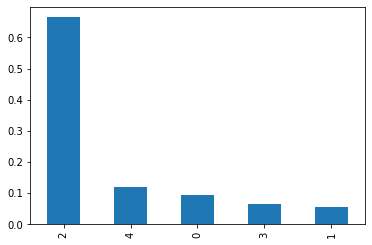

In [ ]:
(df['Cat'].value_counts()/np.float(len(df))).plot.bar()background

In [ ]:
df.shape

(625783, 84)

In [ ]:
x=df.drop(['Sub_Cat','Cat','Label'],axis=1)
y=df['Cat']

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importance=mutual_info_classif(x,y)
feature_importance=pd.Series(importance, x.columns[0:len(x)-1])
feature_importance

Flow_ID       1.086837
Src_IP        0.522309
Src_Port      0.955030
Dst_IP        0.407105
Dst_Port      0.786848
                ...   
Active_Min    0.025640
Idle_Mean     0.467668
Idle_Std      0.096845
Idle_Max      0.482770
Idle_Min      0.440491
Length: 81, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text major ticklabel objects>)

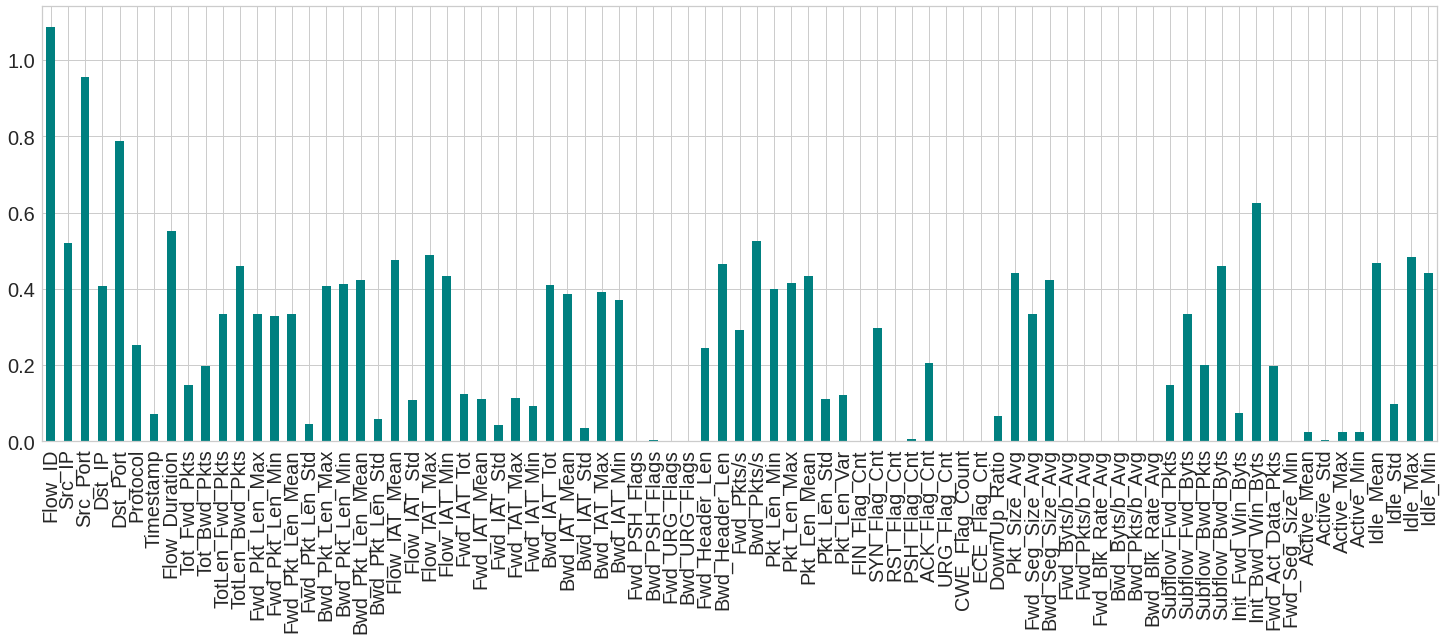

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 8
feature_importance.plot(kind='bar',color='teal',fontsize=25)
# plt.show()
plt.xticks()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text major ticklabel objects>)

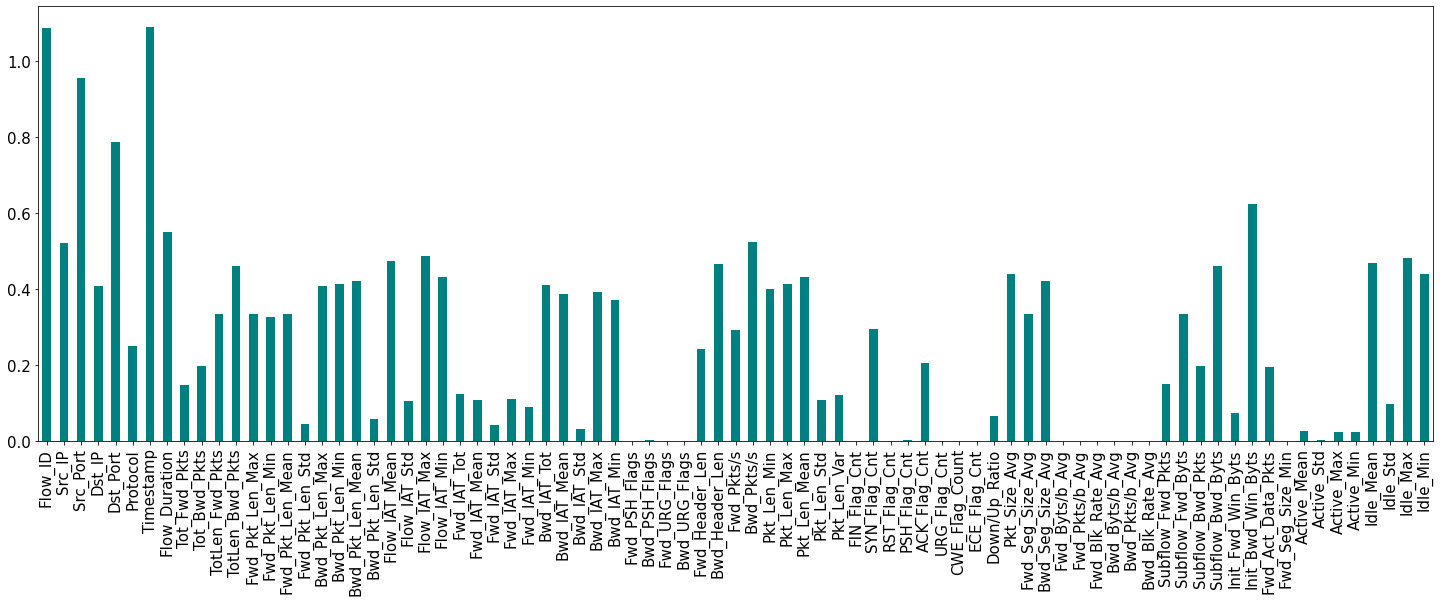

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 8
feature_importance.plot(kind='bar',color='teal',fontsize=15)
# plt.show()
plt.xticks()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text major ticklabel objects>)

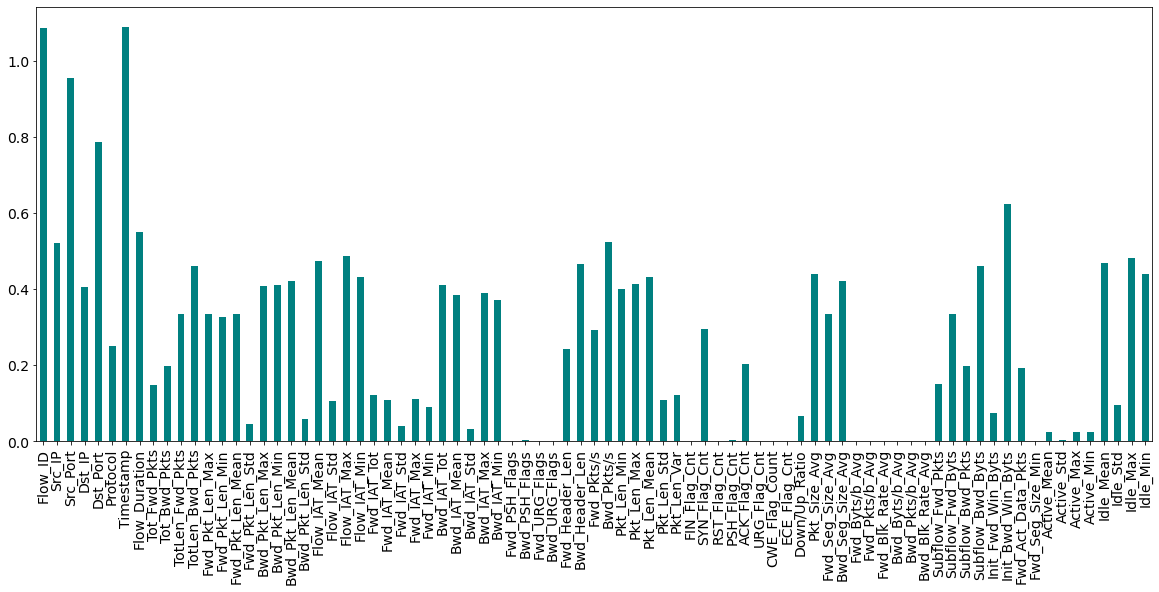

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
feature_importance.plot(kind='bar',color='teal',fontsize=14)
# plt.show()
plt.xticks()

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text major ticklabel objects>)

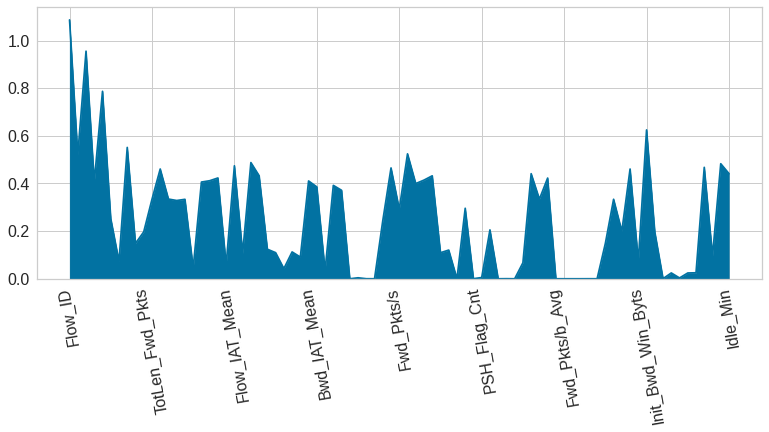

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,5
feature_importance.plot(kind='area',rot=100, fontsize=16)
# plt.show()
plt.xticks()
#autopct='%.2f%%'

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text major ticklabel objects>)

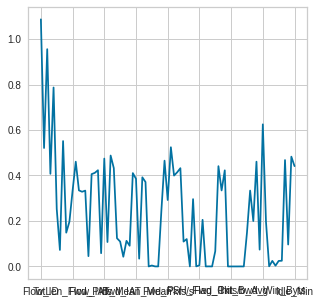

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 5,5
feature_importance.plot(kind = 'line')
# plt.show()
plt.xticks()

In [ ]:
feature_importance

Flow_ID       1.086751
Src_IP        0.521001
Src_Port      0.955539
Dst_IP        0.407470
Dst_Port      0.787018
                ...   
Active_Min    0.025082
Idle_Mean     0.467824
Idle_Std      0.096445
Idle_Max      0.482937
Idle_Min      0.441262
Length: 81, dtype: float64

In [ ]:
feature_importance[0:16]

Flow_ID             1.086751
Src_IP              0.521001
Src_Port            0.955539
Dst_IP              0.407470
Dst_Port            0.787018
Protocol            0.252839
Timestamp           0.072586
Flow_Duration       0.551420
Tot_Fwd_Pkts        0.148558
Tot_Bwd_Pkts        0.196852
TotLen_Fwd_Pkts     0.333430
TotLen_Bwd_Pkts     0.460812
Fwd_Pkt_Len_Max     0.334579
Fwd_Pkt_Len_Min     0.328517
Fwd_Pkt_Len_Mean    0.333500
Fwd_Pkt_Len_Std     0.045338
dtype: float64

In [ ]:
feature_importance[16:30]

Bwd_Pkt_Len_Max     0.406017
Bwd_Pkt_Len_Min     0.411573
Bwd_Pkt_Len_Mean    0.423188
Bwd_Pkt_Len_Std     0.058274
Flow_IAT_Mean       0.474371
Flow_IAT_Std        0.107400
Flow_IAT_Max        0.487834
Flow_IAT_Min        0.432466
Fwd_IAT_Tot         0.124080
Fwd_IAT_Mean        0.109559
Fwd_IAT_Std         0.042631
Fwd_IAT_Max         0.112649
Fwd_IAT_Min         0.091015
Bwd_IAT_Tot         0.410579
dtype: float64

In [ ]:
 feature_importance[30:45]

Bwd_IAT_Mean      0.385625
Bwd_IAT_Std       0.034259
Bwd_IAT_Max       0.392088
Bwd_IAT_Min       0.371373
Fwd_PSH_Flags     0.000000
Bwd_PSH_Flags     0.004114
Fwd_URG_Flags     0.000169
Bwd_URG_Flags     0.000053
Fwd_Header_Len    0.243798
Bwd_Header_Len    0.465317
Fwd_Pkts/s        0.291994
Bwd_Pkts/s        0.524458
Pkt_Len_Min       0.399701
Pkt_Len_Max       0.414236
Pkt_Len_Mean      0.432237
dtype: float64

In [ ]:
 feature_importance[45:60]

Pkt_Len_Std         0.109382
Pkt_Len_Var         0.120409
FIN_Flag_Cnt        0.000000
SYN_Flag_Cnt        0.296007
RST_Flag_Cnt        0.000255
PSH_Flag_Cnt        0.005239
ACK_Flag_Cnt        0.205234
URG_Flag_Cnt        0.000000
CWE_Flag_Count      0.000299
ECE_Flag_Cnt        0.000000
Down/Up_Ratio       0.067175
Pkt_Size_Avg        0.441167
Fwd_Seg_Size_Avg    0.334271
Bwd_Seg_Size_Avg    0.422816
Fwd_Byts/b_Avg      0.000000
dtype: float64

In [ ]:
 feature_importance[60:82]

Fwd_Pkts/b_Avg       0.000000
Fwd_Blk_Rate_Avg     0.000000
Bwd_Byts/b_Avg       0.000000
Bwd_Pkts/b_Avg       0.000126
Bwd_Blk_Rate_Avg     0.000000
Subflow_Fwd_Pkts     0.148126
Subflow_Fwd_Byts     0.333740
Subflow_Bwd_Pkts     0.199635
Subflow_Bwd_Byts     0.460771
Init_Fwd_Win_Byts    0.074044
Init_Bwd_Win_Byts    0.624942
Fwd_Act_Data_Pkts    0.196300
Fwd_Seg_Size_Min     0.000528
Active_Mean          0.024447
Active_Std           0.003380
Active_Max           0.024339
Active_Min           0.025082
Idle_Mean            0.467824
Idle_Std             0.096445
Idle_Max             0.482937
Idle_Min             0.441262
dtype: float64

In [ ]:
feature_importance[-1::]

Idle_Min    0.441262
dtype: float64

In [ ]:
import plotly.graph_objects as px
import numpy as np
  
  
# creating random data through randomint 
# function of numpy.random 
np.random.seed(42)
  
random_x= np.random.randint(1,101,100) 
random_y= np.random.randint(1,101,100)
  
plot = px.Figure(data=[px.Scatter(
    feature_importance,
    mode = 'markers',
     marker=dict(
       color = [10, 20, 30, 50,70,90,100], 
       size = [10, 30, 50, 80,90,100,130],
       showscale=True
     )
)])
                   
plot.show()

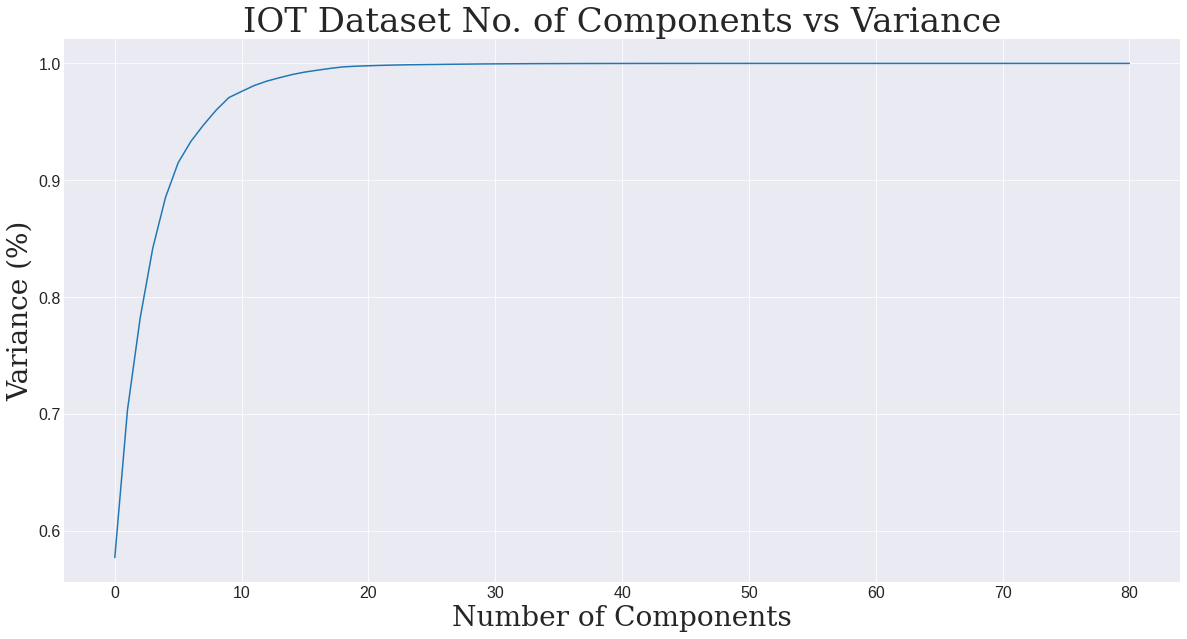

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(x)

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-darkgrid')
%matplotlib inline

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components',fontdict={'family': 'serif','weight': 'normal','size': 28})
plt.ylabel('Variance (%)' , fontdict={'family': 'serif','weight': 'normal','size': 28}) #for each component
plt.title('IOT Dataset No. of Components vs Variance' , fontdict={'family': 'serif','weight': 'normal','size': 34})
plt.show()

In [ ]:
x.shape

(625783, 81)

In [ ]:
feature=np.cumsum(pca.explained_variance_ratio_)

In [ ]:
feature

array([0.57692237, 0.70335053, 0.78203487, 0.8421106 , 0.88532252,
       0.91502916, 0.93323099, 0.94738066, 0.96010582, 0.97077378,
       0.9760162 , 0.98110902, 0.98486895, 0.98779956, 0.99050411,
       0.99261289, 0.99421737, 0.99575548, 0.99703283, 0.99760183,
       0.99799843, 0.99832008, 0.99859203, 0.99878764, 0.99894121,
       0.99907409, 0.9992056 , 0.999323  , 0.99942849, 0.99953264,
       0.9996091 , 0.99967064, 0.99972783, 0.99978123, 0.99982212,
       0.99985121, 0.99987934, 0.99990579, 0.99992194, 0.99993684,
       0.99995116, 0.99996409, 0.9999744 , 0.99998037, 0.99998595,
       0.99998974, 0.9999926 , 0.99999471, 0.99999637, 0.99999762,
       0.99999837, 0.99999889, 0.99999931, 0.9999996 , 0.99999971,
       0.99999979, 0.99999984, 0.99999989, 0.99999993, 0.99999995,
       0.99999997, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
len(feature[feature <= 0.99])

14

In [ ]:
pca = PCA(n_components=14)
x = pca.fit_transform(data_rescaled)

In [ ]:
model=PCA(n_components=14).fit(data_rescaled)
X_pc = model.transform(data_rescaled)
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
 
initial_feature_names =['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81']
 
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
 
# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
 
# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [ ]:
x.shape, y.shape

((625783, 14), (625783,))

In [ ]:
x=pd.DataFrame(x)

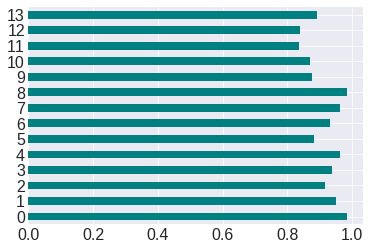

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importance=mutual_info_classif(x,y)
x=pd.DataFrame(x)
feature_importance=pd.Series(importance, x.columns[0:len(x)-1])
feature_importance.plot(kind='barh',color='teal')
plt.show()

In [ ]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=0)
x_rest,y_rest=smk.fit_sample(x,y)

In [ ]:
x_rest.shape, y_rest.shape

((2078373, 14), (2078373,))

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x_rest,y_rest,test_size=0.25,random_state=42)
x_train.shape,x_test.shape

((1558779, 14), (519594, 14))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), xgb.XGBClassifier(  learning_rate =0.1, n_estimators=10,
    max_depth=10, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,objective='multi:softprob',nthread=4,scale_pos_weight=1,seed=27))
#
# Pass instance of pipeline and training and test data set
# cv=10 represents the StratifiedKFold with 10 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)

Cross Validation accuracy scores: [0.99733766 0.99702973 0.99735049 0.99735049 0.99731842 0.99726068
 0.99722219 0.99727992 0.99757503 0.99775464]


In [ ]:
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy: 0.997 +/- 0.000


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgb
xgb_estimator1 = xgb.XGBClassifier(  learning_rate =0.1, n_estimators=10,
    max_depth=10, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,objective='multi:softprob',nthread=4,scale_pos_weight=1,seed=27)
xgb_estimator1.fit(x_train, y_train)
y_pred_xgboost1 =xgb_estimator1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgboost1))
 
# xgboost provides R2 score
print ("Training score:",xgb_estimator1.score(x_train,y_train),"Test Score:",xgb_estimator1.score(x_test,y_test))

Accuracy: 0.9978771887281224
Training score: 0.9980170376942465 Test Score: 0.9978771887281224


In [ ]:
print(classification_report(y_test, y_pred_xgboost1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    104070
           1       1.00      1.00      1.00    103800
           2       1.00      1.00      1.00    104034
           3       1.00      1.00      1.00    104073
           4       1.00      1.00      1.00    103617

    accuracy                           1.00    519594
   macro avg       1.00      1.00      1.00    519594
weighted avg       1.00      1.00      1.00    519594



In [ ]:
confusion_matrix(y_test, y_pred_xgboost1)

array([[103664,    118,     70,    218,      0],
       [     1, 103634,     29,    136,      0],
       [     3,    236, 103571,    132,     92],
       [     4,     38,     10, 104021,      0],
       [     0,      0,     16,      0, 103601]])

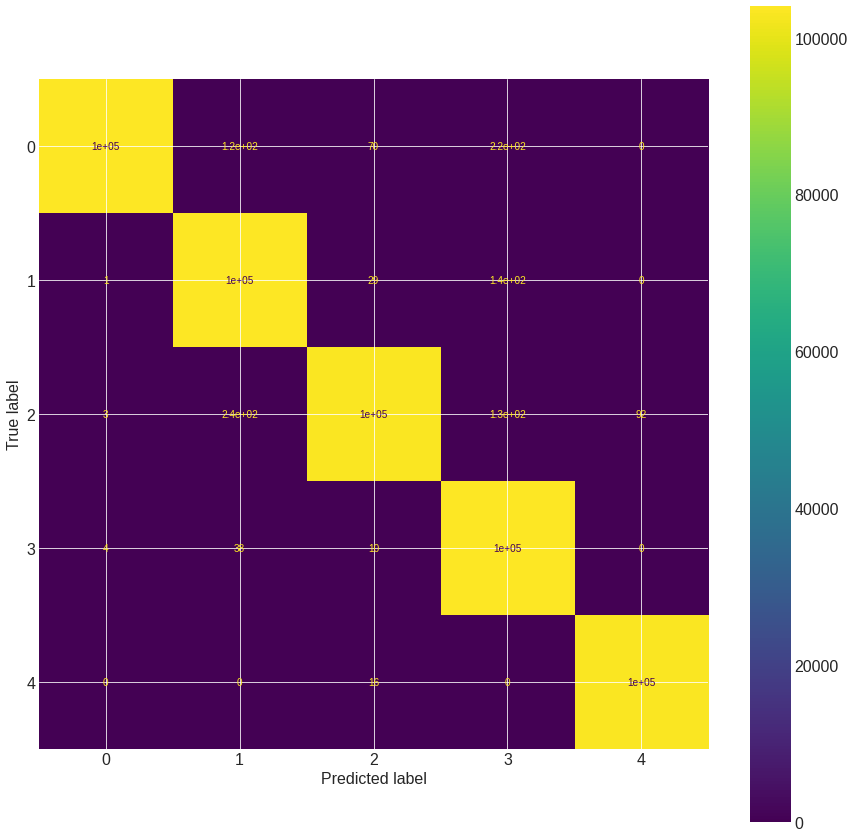

In [ ]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(xgb_estimator1, x_test, y_test,ax=ax)  

In [ ]:
pip install eli5

     |████████████████████████████████| 106 kB 5.2 MB/s 


In [ ]:
import eli5
x=pd.DataFrame(x)
eli5.show_weights(xgb_estimator1)

Weight,Feature
0.1690,f4
0.1508,f7
0.1494,f8
0.0907,f13
0.0830,f1
0.0754,f2
0.0502,f0
0.0393,f12
0.0386,f6
0.0361,f9


In [ ]:
x_test=pd.DataFrame(x_test)

In [ ]:
from eli5 import show_prediction
# show_prediction(xgb_estimator1, x_train.iloc[100].values,feature_names = x.columns.tolist(), show_feature_values=True)
show_prediction(xgb_estimator1, x_test.iloc[519593].values, show_feature_values=True)

In [ ]:
pip install Lime

     |████████████████████████████████| 275 kB 5.7 MB/s 
  Created wheel for Lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=2b2d2e6f668ef1a556a1af88025724760dfb92dbef0f6fa63bddae4e839a9ffc
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built Lime


In [ ]:
import lime
from lime import lime_tabular
x_train=pd.DataFrame(x_train)
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['DoS','MAS','Mirai','Normal','Scan'],
    mode='classification'
)

In [ ]:
x_test=pd.DataFrame(x_test)
exp = explainer.explain_instance(
    data_row=x_test.iloc[519593], 
    predict_fn=xgb_estimator1.predict_proba,top_labels=5
)

exp.show_in_notebook(show_table=True)

In [ ]:
pip install Shap

     |████████████████████████████████| 356 kB 5.1 MB/s 
  Created wheel for Shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491649 sha256=a61e7a1506869188bd4426669030aee3e85e35b5fbc0162825bb0a665e5524c5
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built Shap


In [ ]:
#Attempt to use SHAP on multi-class
import shap
X_rand = x.sample(1, random_state=42)
idx = X_rand.index.values[0]

#This line will not work for a multi-class model, so we comment out
#explainer = shap.TreeExplainer(mcl, model_output='probability', feature_dependence='independent', data=X)

explainer = shap.TreeExplainer(xgb_estimator1)
shap_values = explainer.shap_values(x.iloc[519593])
shap.initjs()
for which_class in range(0,5):
    display(shap.force_plot(explainer.expected_value[which_class], shap_values[which_class], X_rand))
    
#Display all features and SHAP values
df1=pd.DataFrame(data=shap_values[0], columns=x.columns, index=[0])
df2=pd.DataFrame(data=shap_values[1], columns=x.columns, index=[1])
df3=pd.DataFrame(data=shap_values[2], columns=x.columns, index=[2])
df4=pd.DataFrame(data=shap_values[3], columns=x.columns, index=[3])
df5=pd.DataFrame(data=shap_values[4], columns=x.columns, index=[4])
df=pd.concat([df1,df2,df3,df4,df5])
display(df.transpose())

,0,1,2,3,4
0,-0.045518,-0.033192,-0.005845,-0.009519,0.000014
1,-0.066954,0.015315,-0.073274,-0.064819,0.059812
2,-0.000318,0.006707,-0.093801,-0.036814,0.003801
3,-0.006804,-0.033173,-0.051981,0.003278,-0.003452
4,-0.398500,-0.027391,-0.108130,-0.002645,0.083973
5,-0.001909,-0.000880,-0.053094,-0.022534,0.021987
6,0.009621,0.005194,-0.032018,-0.028605,0.001590
7,-0.062949,-0.192271,-0.027841,-0.065335,1.081344
8,-0.000590,-0.192067,-0.002271,-0.447295,0.089176
9,0.000471,-0.015056,0.006091,-0.002405,-0.013026


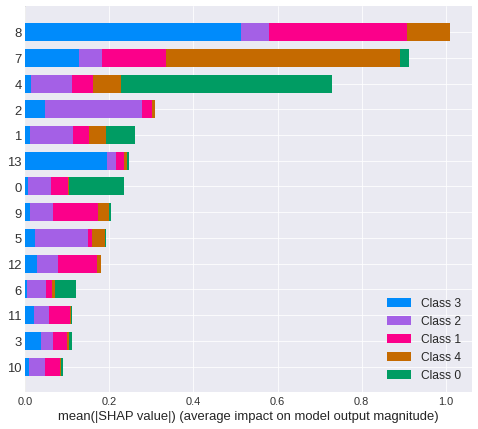

In [ ]:
explainer = shap.TreeExplainer(xgb_estimator1)
shap_values = explainer.shap_values(x_test,approximate=True)
shap.summary_plot(shap_values, x_test, plot_type="bar")

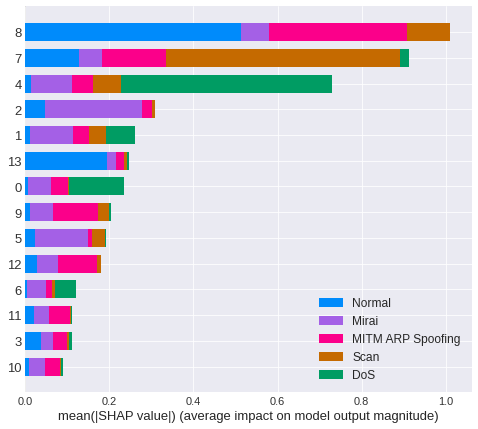

In [ ]:
class_names=['DoS', 'MITM ARP Spoofing', 'Mirai', 'Normal', 'Scan']
shap.summary_plot(
            shap_values, x_test, class_names=class_names
 )